In [1]:
%matplotlib inline

from fastai.vision import *
from fastai import *

In [10]:
resnet = models.resnet34(True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/sairahul/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:08<00:00, 10587702.71it/s]


In [3]:
CIFAR_PATH = Path("/home/sairahul/myfiles/fastai_cmd/datasets/cifar10")

In [24]:
data = (ImageDataBunch.from_folder(path=CIFAR_PATH, valid='test', ds_tfms=[], bs=64))

In [23]:
data = (ImageDataBunch.from_folder(CIFAR_PATH, ds_tfms=[], valid='test', bs=64).normalize(imagenet_stats))

In [31]:
x, y = next(iter(data.train_dl))

In [39]:
x = open_image(CIFAR_PATH/"train/airplane/1979.png")

In [42]:
x.data.shape

torch.Size([3, 32, 32])

In [60]:
x.data[0].flatten().mean(), x.data[0].flatten().std()

(tensor(0.3274), tensor(0.1292))

In [54]:
tensors = []
mean_r = 0
std_r = 0
mean_b = 0
std_b = 0
mean_g = 0
std_g = 0
for i, clas in enumerate((CIFAR_PATH/'train').iterdir()):
    print("processing (%s): %s"%(i, clas))
    for j, file in enumerate(clas.iterdir()):
        t = open_image(file).data
        tensors.append(t)
        mean_r += t[0].flatten().mean()
        std_r += t[0].flatten().std()

processing (0): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/airplane
processing (1): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/truck
processing (2): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/dog
processing (3): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/deer
processing (4): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/automobile
processing (5): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/cat
processing (6): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/bird
processing (7): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/horse
processing (8): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/ship
processing (9): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/train/frog


In [46]:
mean_r/50000.0

tensor(0.4914)

In [47]:
std_r/50000.0

tensor(0.2023)

In [130]:
t = torch.stack(tensors, dim=0)

In [131]:
print(t.std([0, 2, 3]))
print(t.mean([0, 2, 3]))

tensor([0.2470, 0.2435, 0.2616])
tensor([0.4914, 0.4822, 0.4465])


In [38]:
for i, clas in enumerate((CIFAR_PATH/'test').iterdir()):
    print("processing (%s): %s"%(i, clas))
    for j, file in enumerate(clas.iterdir()):
        tensors.append(open_image(file).data)
        if (j%1000) == 0:
            print(j)

processing (0): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/airplane
0
processing (1): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/truck
0
processing (2): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/dog
0
processing (3): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/deer
0
processing (4): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/automobile
0
processing (5): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/cat
0
processing (6): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/bird
0
processing (7): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/horse
0
processing (8): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/ship
0
processing (9): /home/sairahul/myfiles/fastai_cmd/datasets/cifar10/test/frog
0


In [132]:
z = torch.randn(4, 100)

In [138]:
torch.zeros(4, 100, 1, 1).normal_(0, 1)

tensor([[[[-0.1395]],

         [[ 0.0637]],

         [[-1.7390]],

         [[ 0.2053]],

         [[ 0.8944]],

         [[-0.3356]],

         [[-0.1815]],

         [[ 1.8264]],

         [[-1.0801]],

         [[ 0.2959]],

         [[-0.2936]],

         [[-0.9119]],

         [[-1.1691]],

         [[ 1.3848]],

         [[-0.2555]],

         [[ 0.8861]],

         [[ 1.2184]],

         [[-1.1391]],

         [[ 0.1614]],

         [[ 0.5018]],

         [[-1.0180]],

         [[ 1.0611]],

         [[ 0.3909]],

         [[ 1.6403]],

         [[-0.7277]],

         [[ 1.0560]],

         [[ 1.6125]],

         [[-0.3065]],

         [[-1.7913]],

         [[ 1.9484]],

         [[ 0.2359]],

         [[ 0.6453]],

         [[ 0.1237]],

         [[-0.8091]],

         [[-1.3559]],

         [[ 1.2192]],

         [[-1.2814]],

         [[ 0.0484]],

         [[ 1.0999]],

         [[ 0.2278]],

         [[-0.4512]],

         [[ 1.4755]],

         [[-0.7108]],

         [[

In [143]:
from fastai.vision.gan import *

In [139]:
path = untar_data(URLs.LSUN_BEDROOMS)

In [144]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [145]:
data = get_data(128, 64)

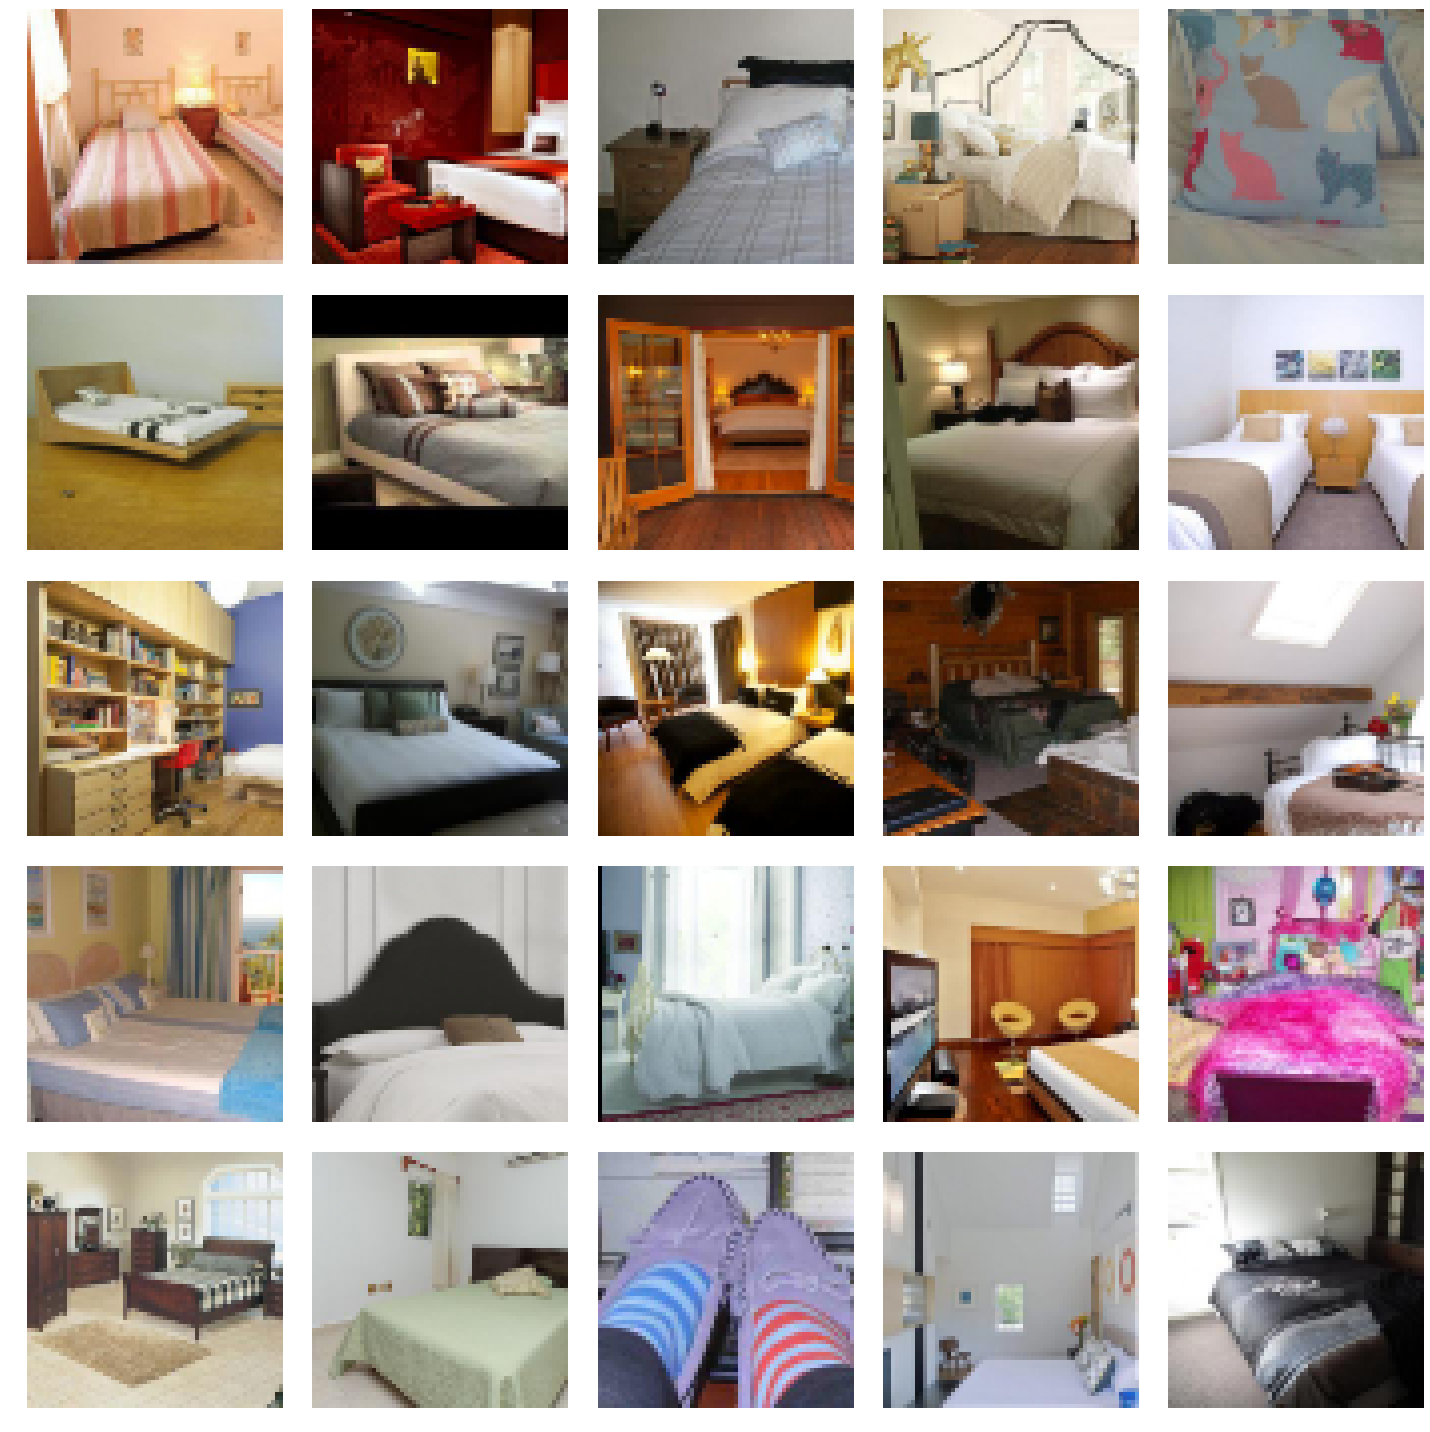

In [146]:
data.show_batch()

In [147]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [148]:
generator

Sequential(
  (0): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (4): Sequential(
    (0): ConvTranspose2d(64, 64, kernel_size=(3, 3)

In [149]:
critic

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace)
  )
  (1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.2, inplace)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4),

In [150]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.784632,#na#,0.581325,-1.044616,03:57
1,-0.750667,#na#,0.470570,-0.985033,03:29
2,-0.763849,#na#,0.516637,-1.024386,03:27
3,-0.604148,#na#,0.430245,-0.805255,03:27
4,-0.594877,#na#,0.409654,-0.793859,03:28
5,-0.536552,#na#,0.405326,-0.744448,03:28
6,-0.498431,#na#,0.364474,-0.661423,03:28
7,-0.465502,#na#,0.331585,-0.628125,03:28
8,-0.418749,#na#,0.294517,-0.566131,03:28
9,-0.407351,#na#,0.269790,-0.535321,03:28


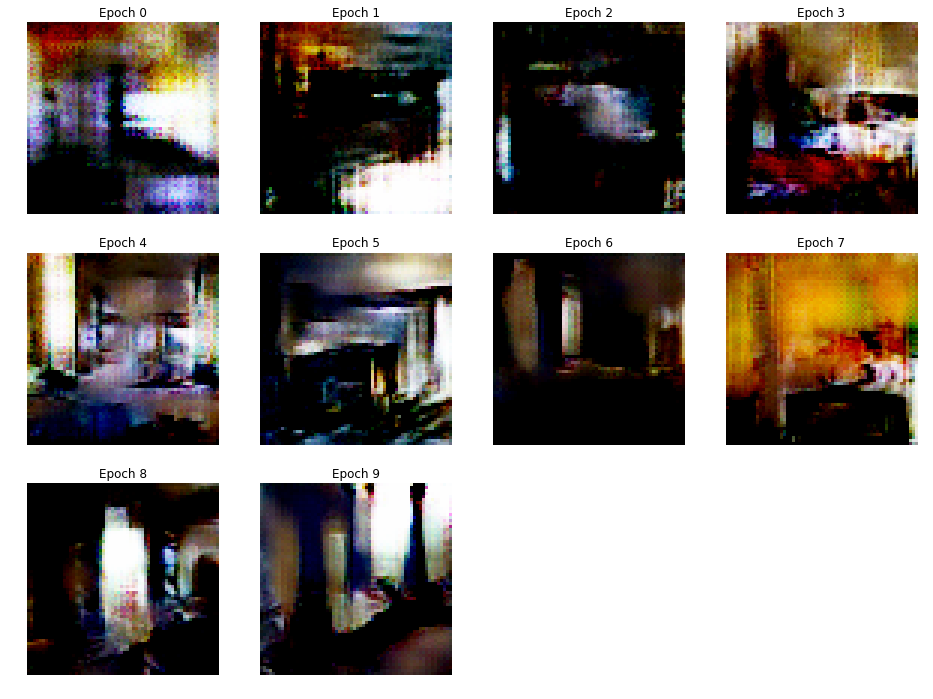

In [151]:
learn.fit(10, 2e-4)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.378760,#na#,0.268554,-0.506548,03:28
1,-0.362909,#na#,0.248354,-0.488711,03:28
2,-0.332652,#na#,0.213047,-0.447813,03:29
3,-0.316482,#na#,0.197446,-0.417159,03:29
4,-0.294379,#na#,0.177485,-0.392957,03:28
5,-0.285429,#na#,0.161124,-0.374257,03:28
6,-0.293985,#na#,0.149178,-0.367377,03:28
7,-0.260607,#na#,0.163464,-0.350938,03:28
8,-0.244717,#na#,0.137315,-0.322507,03:28
9,-0.237651,#na#,0.155629,-0.313781,03:28


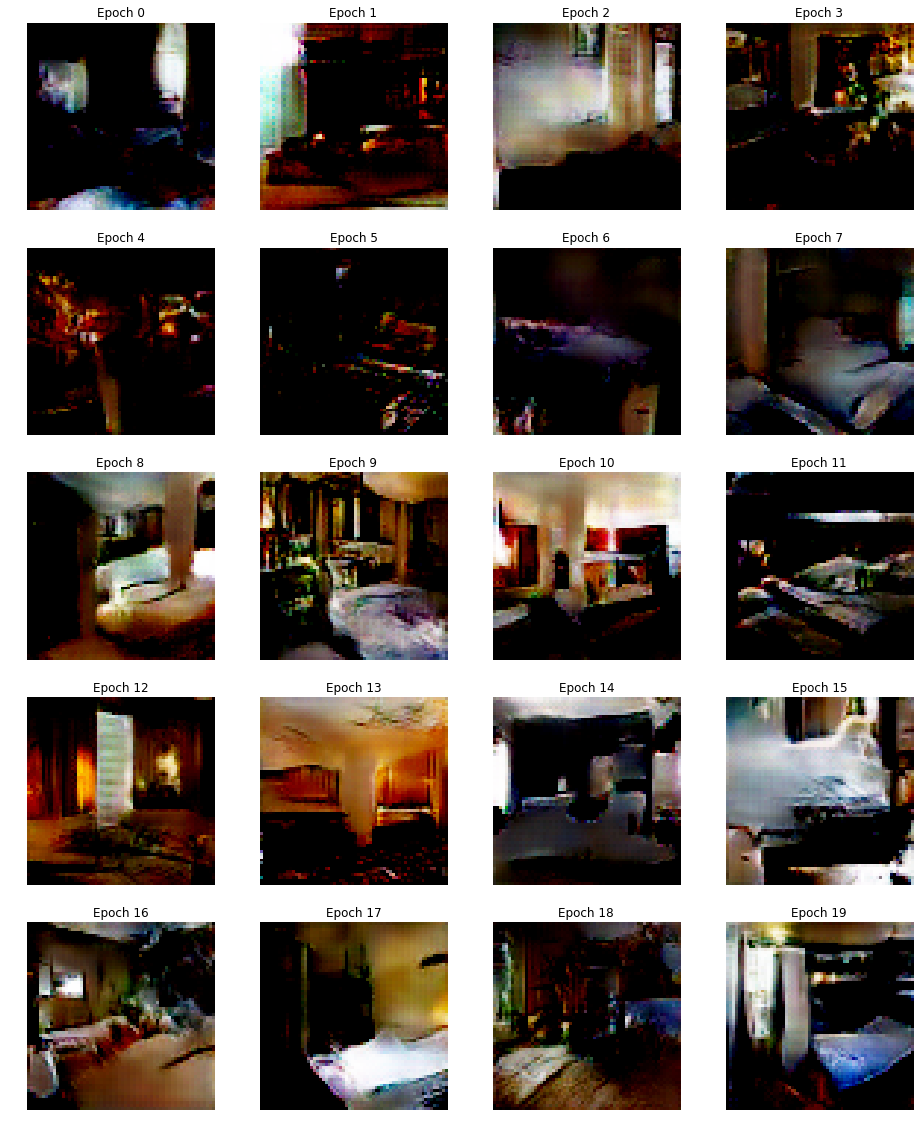

In [152]:
learn.fit(20, 2e-4)

In [153]:
learn.save('gans-v1')